# Boston House Price Prediction 2

In [1]:
#loading Boston Datasets and required libaries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.datasets import load_boston
boston = load_boston()
#Transform dataset to dataframe
bos = pd.DataFrame(boston.data)

In [2]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
#Giving column names to datasets
bos.columns=boston.feature_names
bos.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
#Adding Target values PRICE to dataframe
bos['PRICE']=boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
#checking shape of data
bos.shape

(506, 14)

In [6]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
#As seen above there are no null values as Sklearn always provides with clean data
#We will crosschecking the null values

bos.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

<AxesSubplot:>

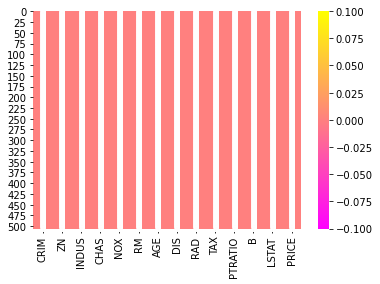

In [8]:
#No null values; we will use heatmap for the same
sns.heatmap(bos.isnull(),annot=True,cmap="spring",)

<AxesSubplot:>

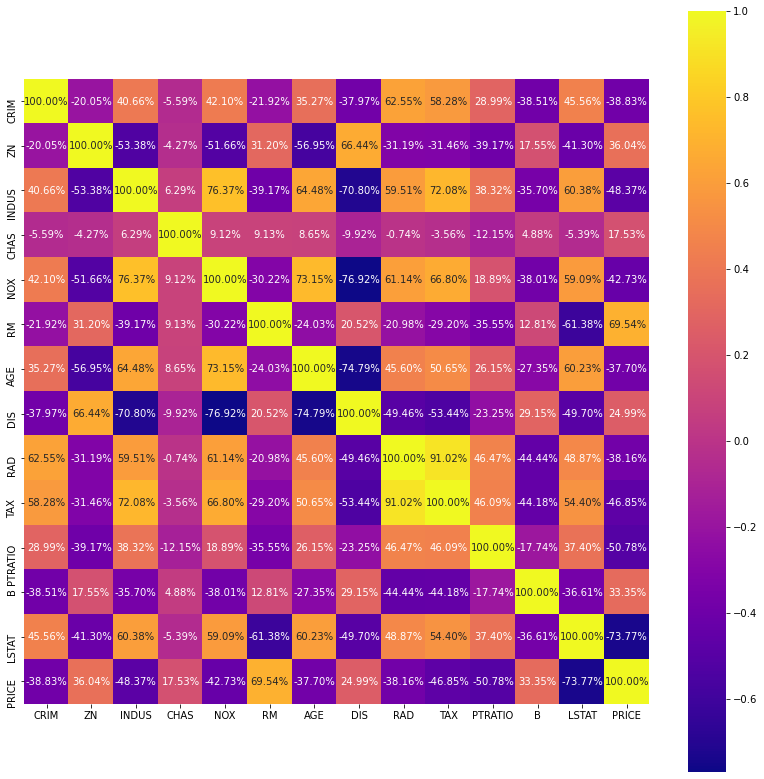

In [9]:
#Checking the correlation matrix for dataset

plt.figure(figsize=(14,14))
sns.heatmap(bos.corr(), square= True, fmt='.2%', annot=True, cmap='plasma')


In [10]:
# From above heatmap it is clear that LSTAT , RM, PTRATIO are correlated with PRICE.

X = bos.iloc[:,0:13] #independent columns
y =bos.iloc[:,-1] #target column i.e price range

# Using OLS method for more feature extraction.
import statsmodels.api as smf
model=smf.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  PRICE   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              891.3
Date:                Thu, 01 Jul 2021   Prob (F-statistic):                        0.00
Time:                        10:17:27   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3074.
Df Residuals:                     493   BIC:                                      3128.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0929      0.034     -2.699      0.007      -0.161      -0.025
ZN             0.0487      0.014      3.382      0.001       0.020       0.077
INDUS         -0.0041      0.064     -0.063      0.950      -0.131       0.123
CHAS           2.8540      0.904      3.157      0.002       1.078       4.630
NOX           -2.8684      3.359     -0.854      0.394      -9.468       3.731
RM             5.9281      0.309     19.178      0.000       5.321       6.535
AGE           -0.0073      0.014     -0.526      0.599      -0.034       0.020
DIS           -0.9685      0.196     -4.951      0.000      -1.353      -0.584
RAD            0.1712      0.067      2.564      0.011       0.040       0.302
TAX           -0.0094      0.004     -2.395      0.017      -0.017      -0.002
PTRATIO       -0.3922      0.110     -3.570      0.000      -0.608      -0.176
B              0.0149      0.003      5.528      0.000       0.010       0.020
LSTAT         -0.4163      0.051     -8.197      0.000      -0.516      -0.317
==============================================================================
Omnibus:                      204.082   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1374.225
Skew:                           1.609   Prob(JB):                    3.90e-299
Kurtosis:                      10.404   Cond. No.                     8.50e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
#From above summary we can select LSTAT,RM, PTRATIO (Correlated in heatmap)
#and ZN, CHAS, DIS also as our important features

X=bos[['ZN','CHAS','RM','DIS','B','LSTAT','PTRATIO']]
y=bos['PRICE']

In [12]:
#Spliting Data into train and test.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [13]:
#Standardisation of data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
model=LinearRegression()
model.fit(x_train,y_train)
y_predict_train = model.predict(x_train)
y_predict_test = model.predict(x_test)

In [15]:
print("Training Accuracy", model.score(x_train,y_train)*100)
print('MSE Train', mean_squared_error(y_train,y_predict_train))

Training Accuracy 74.72923011169016
MSE Train 20.31961273822245


In [16]:
print("Test Accuracy", model.score(x_test,y_test)*100)
print('MSE Test', mean_squared_error(y_test,y_predict_test))

Test Accuracy 53.517917181872335
MSE Test 45.14037195761866


### Trying to improve accuracy of model

C:\Users\ABC\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LSTAT', ylabel='Density'>

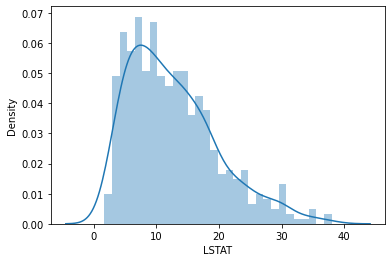

In [17]:
#Checking for normal distribution 
sns.distplot(bos['LSTAT'], bins=30)

C:\Users\ABC\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LSTAT', ylabel='Density'>

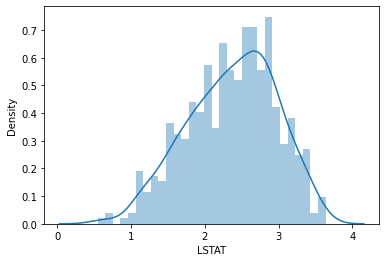

In [18]:
# histogram of the log-transformed LSTAT for comparison
sns.distplot(np.log(bos['LSTAT']), bins=30)

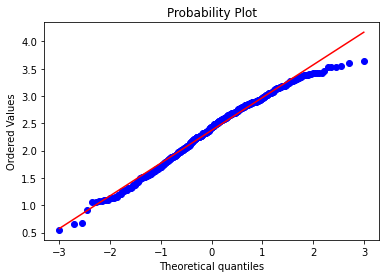

In [19]:
stats.probplot(np.log(bos['LSTAT']), dist="norm", plot=plt)
plt.show()

C:\Users\ABC\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DIS', ylabel='Density'>

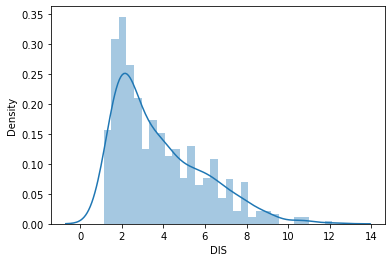

In [20]:
sns.distplot(bos['DIS'], bins=30)

C:\Users\ABC\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DIS', ylabel='Density'>

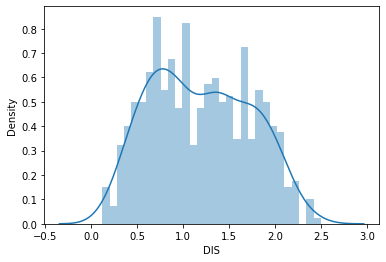

In [21]:
sns.distplot(np.log(bos['DIS']), bins=30)

C:\Users\ABC\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RM', ylabel='Density'>

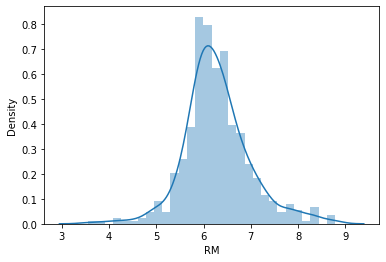

In [22]:
sns.distplot(bos['RM'], bins=30)

C:\Users\ABC\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RM', ylabel='Density'>

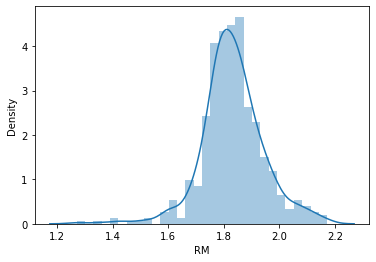

In [23]:
sns.distplot(np.log(bos['RM']), bins=30)

In [24]:
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [25]:
bos.columns=boston.feature_names
bos['PRICE']=boston.target

In [26]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [27]:
bos['LSTAT']=np.log(bos['LSTAT'])
bos['DIS']=np.log(bos['DIS'])

In [28]:
X=bos[['ZN','CHAS','RM','DIS','B','LSTAT','PTRATIO']]
y=bos['PRICE']

In [29]:
#Spliting Data into train and test.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [30]:
#Standardisation of data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
model=LinearRegression()
model.fit(x_train,y_train)
y_predict_train = model.predict(x_train)
y_predict_test = model.predict(x_test)

In [32]:
print("Training Accuracy", model.score(x_train,y_train)*100)
print('MSE Train', mean_squared_error(y_train,y_predict_train))

Training Accuracy 79.51089331024495
MSE Train 17.122946850057076


In [33]:
print("Test Accuracy", model.score(x_test,y_test)*100)
print('MSE Test', mean_squared_error(y_test,y_predict_test))

Test Accuracy 66.38661004106403
MSE Test 29.487072045358985


In [34]:
import pickle
with open('model/model.pkl','wb') as file:
    pickle.dump(model, file)

In [35]:
# saving the columns
model_columns = list(X.columns)
with open('model/model_columns.pkl','wb') as file:
    pickle.dump(model_columns, file)